## Hecho Por: Juan Felipe Camelo, Silvana Sandoval, Adrián Suárez

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
x = sym.symbols('x')
f_expr = 3*x**3-10*x**2-56*x+50
f_prime = f_expr.diff(x)
f_double_prime = f_prime.diff(x)

In [4]:
def NR(x0):
    x_lista = []
    i = 1
    xi = x0
    a = 1
    conv = 0.001
    while abs(f_prime.subs(x, xi)) > conv:
        xi1 = xi - a*(f_prime.subs(x, xi)/f_double_prime.subs(x, xi))
        x_lista.append(xi1)
        xi = xi1
    return xi

In [5]:
x0 = 0
x1 = 2
inflexion0 = NR(x0)
inflexion1 = NR(x1)

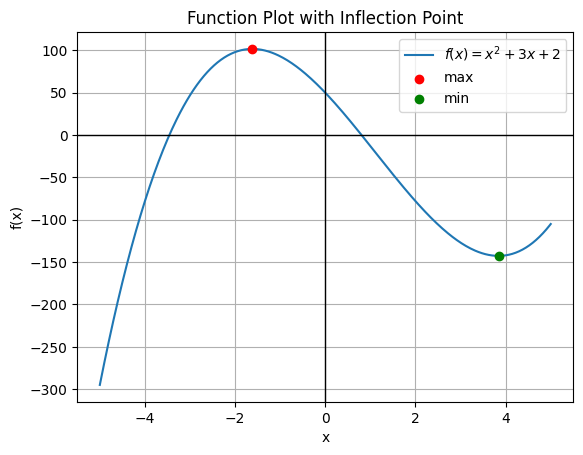

In [6]:
# Convert the symbolic function to a numerical function
f_numeric = sym.lambdify(x, f_expr, 'numpy')

# Generate x values for plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = f_numeric(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 + 3x + 2$')

# Plot the inflection point
inflexion_x0 = float(inflexion0)
inflexion_x1 = float(inflexion1)
inflexion_y0 = f_numeric(inflexion_x0)
inflexion_y1 = f_numeric(inflexion_x1)

plt.scatter(inflexion_x0, inflexion_y0, color='red', zorder=5, label='max')
plt.scatter(inflexion_x1, inflexion_y1, color='green', zorder=5, label='min')

# Customize the plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot with Inflection Point')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Ejercicio 2

Para empezar, vamos a definir los símbolos que usa la función a optimizar. Además, declararemos esta.

In [7]:
x = sym.symbols('x')
f_expr = x**5 - 8*x**3 + 10*x + 6
primera_derivada = f_expr.diff(x)
segunda_derivada = primera_derivada.diff(x)

Ahora convertimos las derivadas anteriores en funciones matematicas que puedan ser usadas por un algoritmo.

In [8]:
primera_derivada_func = sym.lambdify(x, primera_derivada, 'numpy')
segunda_derivada_func = sym.lambdify(x, segunda_derivada, 'numpy')

Ahora implementaremos el método de Newton-Raphson para poder encontrar el máximo y el mínimo local.

In [9]:
def newton_raphson(primera_derivada_func, segunda_derivada_func, x0, tol=1e-6, max_iter = 100):
    x_n = x0
    for i in range(max_iter):
        valor_primera_der = primera_derivada_func(x_n)
        valor_segunda_der = segunda_derivada_func(x_n)
        if abs(valor_primera_der) < tol: #Esto indica si la primera derivada es cercana a 0. De ser así, encontramos una de las raíces.
            return x_n
        x_n = x_n - valor_primera_der / valor_segunda_der
    return None


Ahora crearemos un rango donde se puedan buscar los puntos críticos de la función. Además, crearemos una lista para guardar los puntos críticos

In [10]:
rango = np.linspace(-3, 3, 10)
criticos = []

Procederemos a buscar los puntos críticos con la función que hicimos anteriormente

In [11]:
for x0 in rango:
    punto_critico = newton_raphson(primera_derivada_func, segunda_derivada_func, x0)
    if punto_critico is not None:
        criticos.append(punto_critico)

print(criticos)

[-2.0830439128752793, -2.0830439133373444, -2.0830439128765024, -0.678916826300151, -0.6789168263170748, 0.6789168263170748, 0.678916826300151, 2.0830439128765024, 2.0830439133373444, 2.0830439128752793]


Ahora encontraremos el máximo y el mínimo global en es rango

In [12]:
max_global = max(criticos)
min_global = min(criticos)
globales = []
globales.append(max_global)
globales.append(min_global)

Ahora, graficaremos los resultados.

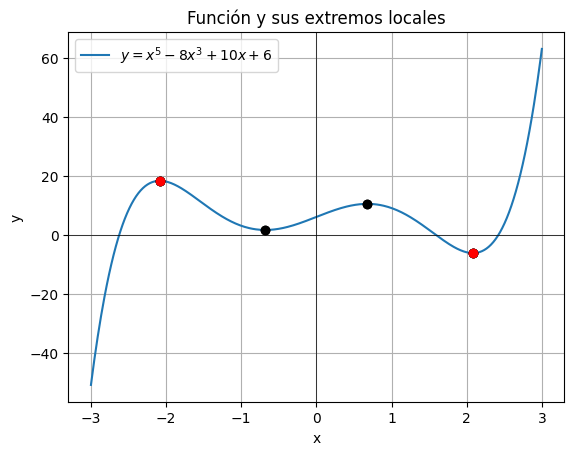

In [17]:
# Crear un espacio de valores x para graficar la función
f_func = sym.lambdify(x, f_expr, 'numpy')
x_vals = np.linspace(-3, 3, 400)
y_vals = f_func(x_vals)

# Graficar la función
plt.plot(x_vals, y_vals, label=r'$y = x^5 - 8x^3 + 10x + 6$')

# Graficar los puntos críticos encontrados
for point in criticos:
    plt.plot(point, f_func(point), 'ko')
    
for point in globales:
    plt.plot(point, f_func(point), 'ro')

# Añadir detalles a la gráfica
plt.title('Función y sus extremos locales')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Mostrar la gráfica
plt.show()


# Ejercicio 3

Declaramos la función que vamos a usar junto a sus símbolos, y calculamos el gradiente junto con la matriz Hessiana; todo con ayuda del software estadístico. Finalmente pasamos estas expresiones a númericas

In [14]:
x, y = sym.symbols('x y')
z_expr = (x - 1)**2 + 100 * (y - x**2)**2
grad = [sym.diff(z_expr, var) for var in (x, y)]
hessian = sym.Matrix([[sym.diff(g, var) for var in (x, y)] for g in grad])

grad_func = sym.lambdify((x, y), grad, 'numpy')
hessian_func = sym.lambdify((x, y), hessian, 'numpy')

Creamos el método Newton-Raphson en 3D

In [15]:
def NR_3D(x0, y0, alpha=1, tol=1e-6, max_iter=100):
    x_lista = []
    xi, yi = x0, y0
    for i in range(max_iter):
        grad_val = np.array(grad_func(xi, yi), dtype=float)
        hessian_val = np.array(hessian_func(xi, yi), dtype=float)
        delta = np.linalg.solve(hessian_val, -grad_val)
        xi, yi = xi + alpha * delta[0], yi + alpha * delta[1]
        x_lista.append((xi, yi))
        if np.linalg.norm(grad_val) < tol:
            break
    return xi, yi, x_lista

Hallamos el mínimo, creamos la malla de puntos para nuestras variables, así podemos graficar, y evaluamos la función

0.9999999999999876 0.999999999999975 1.5584933258772614e-28


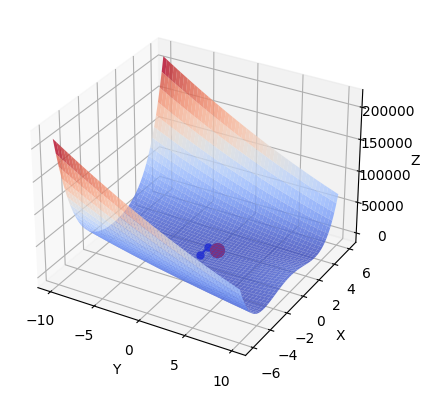

In [19]:
# Encontrar el mínimo
x_min, y_min, lista= NR_3D(0, 10)

# Crear una malla de puntos para x e y
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-10, 10, 400)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

# Evaluar la función en la malla de puntos
z_func = sym.lambdify((x, y), z_expr, 'numpy')
z_vals = z_func(x_mesh, y_mesh)

# Graficar la superficie y el punto mínimo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(y_mesh, x_mesh, z_vals, cmap= 'coolwarm', alpha=0.8)  # Intercambiar x_mesh y y_mesh
ax.scatter(y_min, x_min, z_func(x_min, y_min), color='r', s=100)  # Intercambiar x_min y y_min

# Graficar los puntos de la lista y la línea entre ellos
x_lista = [p[0] for p in lista]
y_lista = [p[1] for p in lista]
z_lista = [z_func(p[0], p[1]) for p in lista]
ax.plot(y_lista, x_lista, z_lista, color='b', marker='o', markersize=5)

# imprimir coordenadas último punto
print(x_min, y_min, z_func(x_min, y_min))

# Etiquetas de los ejes
ax.set_xlabel('Y')  
ax.set_ylabel('X')  
ax.set_zlabel('Z')  

plt.show()